# Weather forecasts from the National Weather Service

## Data-Scraping

In [1]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
from IPython.core.display import clear_output
from time import sleep
import requests
from random import randint
from time import time 
from warnings import warn
import matplotlib.pyplot as plt

In [4]:
page = requests.get("http://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168")
soup = BeautifulSoup(page.content, 'html.parser')
seven_day = soup.find(id="seven-day-forecast")
forecast_items = seven_day.find_all(class_="tombstone-container")
tonight = forecast_items[0]
print(tonight.prettify())

<div class="tombstone-container">
 <p class="period-name">
  Today
  <br/>
  <br/>
 </p>
 <p>
  <img alt="Today: Sunny, with a high near 76. Light west southwest wind becoming west 11 to 16 mph in the afternoon. Winds could gust as high as 22 mph. " class="forecast-icon" src="newimages/medium/few.png" title="Today: Sunny, with a high near 76. Light west southwest wind becoming west 11 to 16 mph in the afternoon. Winds could gust as high as 22 mph. "/>
 </p>
 <p class="short-desc">
  Sunny
 </p>
 <p class="temp temp-high">
  High: 76 °F
 </p>
</div>


In [5]:
period = tonight.find(class_="period-name").get_text()
short_desc = tonight.find(class_="short-desc").get_text()
temp = tonight.find(class_="temp").get_text()
print(period)
print(short_desc)
print(temp)

Today
Sunny
High: 76 °F


In [6]:
img = tonight.find("img")
desc = img['title']
print(desc)

Today: Sunny, with a high near 76. Light west southwest wind becoming west 11 to 16 mph in the afternoon. Winds could gust as high as 22 mph. 


In [7]:
period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
periods

['Today',
 'Tonight',
 'Sunday',
 'SundayNight',
 'Monday',
 'MondayNight',
 'Tuesday',
 'TuesdayNight',
 'Wednesday']

In [10]:
short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]
temps = [t.get_text() for t in seven_day.select(".tombstone-container .temp")]
descs = [d["title"] for d in seven_day.select(".tombstone-container img")]
print(short_descs)
print(temps)
print(descs)

['Sunny', 'Mostly Clear', 'Sunny', 'Partly Cloudy', 'Mostly Sunny', 'Mostly Cloudy', 'Mostly Sunny', 'Mostly Clear', 'Mostly Sunny']
['High: 76 °F', 'Low: 58 °F', 'High: 75 °F', 'Low: 57 °F', 'High: 71 °F', 'Low: 56 °F', 'High: 69 °F', 'Low: 54 °F', 'High: 66 °F']
['Today: Sunny, with a high near 76. Light west southwest wind becoming west 11 to 16 mph in the afternoon. Winds could gust as high as 22 mph. ', 'Tonight: Mostly clear, with a low around 58. West southwest wind 6 to 16 mph, with gusts as high as 21 mph. ', 'Sunday: Sunny, with a high near 75. Light west southwest wind increasing to 9 to 14 mph in the afternoon. ', 'Sunday Night: Partly cloudy, with a low around 57. West southwest wind 7 to 14 mph, with gusts as high as 18 mph. ', 'Monday: Mostly sunny, with a high near 71. West southwest wind 6 to 13 mph. ', 'Monday Night: Mostly cloudy, with a low around 56.', 'Tuesday: Mostly sunny, with a high near 69.', 'Tuesday Night: Mostly clear, with a low around 54.', 'Wednesday: M

## Data Analysis

In [17]:
df = pd.DataFrame({
"Period": periods,
"Short Desc": short_descs,
"Temp": temps,
"Description":descs
})
df.head()

,Period,Short Desc,Temp,Description
0,Today,Sunny,High: 76 °F,"Today: Sunny, with a high near 76. Light west ..."
1,Tonight,Mostly Clear,Low: 58 °F,"Tonight: Mostly clear, with a low around 58. W..."
2,Sunday,Sunny,High: 75 °F,"Sunday: Sunny, with a high near 75. Light west..."
3,SundayNight,Partly Cloudy,Low: 57 °F,"Sunday Night: Partly cloudy, with a low around..."
4,Monday,Mostly Sunny,High: 71 °F,"Monday: Mostly sunny, with a high near 71. Wes..."


In [43]:
df.shape

(9, 4)

In [18]:
# Converting Temp column to have just integers
temp_nums = df["Temp"].str.extract("(?P<temp_num>\d+)", expand=False)
df["Temp"] = temp_nums.astype('int')
temp_nums

0    76
1    58
2    75
3    57
4    71
5    56
6    69
7    54
8    66
Name: temp_num, dtype: object

In [19]:
# Average temperature
df["Temp"].mean()

64.66666666666667

Text(0,0.5,'Temperature in F*')

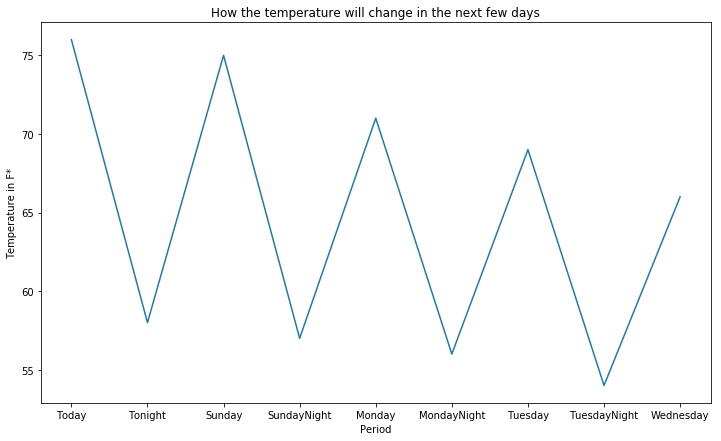

In [28]:
plt.figure(figsize=(12,7))
plt.plot(df["Period"], df["Temp"])
plt.title("How the temperature will change in the next few days")
plt.xlabel("Period")
plt.ylabel("Temperature in F*")

In [42]:
# Calculating temperature difference between day and night
diff = []
for i in range(0, len(df["Temp"])-1,2):
    diff.append(df.iloc[i+1,2] - df.iloc[i,2])
    
print(diff)

[-18, -18, -15, -15]
